In [26]:
import numpy as np
import matplotlib.pyplot as plt

__np.newaxis__ to explicitly convert a 1D array to either a row vector or a column vector,

In [27]:
np.newaxis is None

True

In [28]:
# Newaxis
arr = np.arange(4)

print(arr)
print(arr.shape)

[0 1 2 3]
(4,)


In [29]:
# make it as row vector by inserting an axis along first dimension
row_vec = arr[np.newaxis, :]

print(row_vec)
row_vec.shape

[[0 1 2 3]]


(1, 4)

In [30]:
# make it as column vector by inserting an axis along second dimension
col_vec = arr[:, np.newaxis]
print(col_vec)
col_vec.shape

[[0]
 [1]
 [2]
 [3]]


(4, 1)

In [31]:
data_x  = np.linspace(1.0, 10.0, 100)
data_x.shape

(100,)

In [32]:
np.linspace(1.0, 10.0, 100)[:, np.newaxis].shape

(100, 1)

In [33]:
# Generate our data, covert to column vector
data_x  = np.linspace(1.0, 10.0, 100)[:, np.newaxis]

data_y  = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

data_x /= np.max(data_x)

In [34]:
# Add intercept data and normalize
data_x = np.hstack((np.ones_like(data_x), data_x))

In [35]:
data_x[:5]

array([[1.        , 0.1       ],
       [1.        , 0.10909091],
       [1.        , 0.11818182],
       [1.        , 0.12727273],
       [1.        , 0.13636364]])

In [36]:
# Shuffle data and produce train and test sets
order    = np.random.permutation(len(data_x))
portion  = 20


In [37]:
order

array([49, 29, 82,  0, 22, 95,  4,  2, 32, 89, 17, 73, 37, 19, 45, 35, 86,
       30, 55, 25, 24, 34,  1, 79, 46, 60, 12,  6, 13, 40, 48, 84, 91, 72,
       42, 43, 87, 27,  9, 20, 85, 56, 68, 70, 77, 64, 62, 50, 14, 69, 63,
       53, 65, 78, 76, 94, 88, 21, 92, 11, 15,  3, 28, 57, 44, 16, 61, 10,
       18, 38, 96, 83, 59, 51, 98, 36, 47,  8, 67,  5, 75, 23, 41,  7, 33,
       39, 97, 52, 99, 81, 80, 31, 26, 54, 58, 74, 71, 66, 93, 90])

In [38]:
# slice data
test_x   = data_x[order[:portion]]
test_y   = data_y[order[:portion]]

train_x  = data_x[order[portion:]]
train_y  = data_y[order[portion:]]

In [40]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(80, 2)
(80, 1)
(20, 2)
(20, 1)


In [41]:
print(train_x[:3])
print(train_y[:3])

[[1.         0.31818182]
 [1.         0.40909091]
 [1.         0.10909091]]
[[1.03828995]
 [1.34319675]
 [1.59302016]]


#### function
$ y = X\beta $

#### Error function
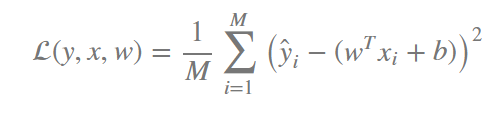

__Gradient Descent__
One of the methods we can use to minimize the loss function is Gradient Descent, which is based on using gradients to update the model parameters (w and b in our case) until a minimum is found and the gradient becomes zero. 

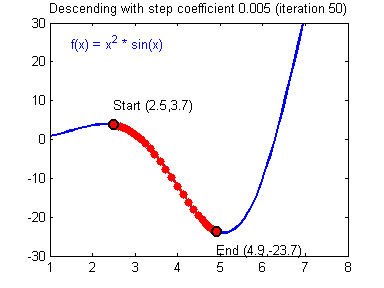

Taking the __gradients__ of the loss function, (the derivatives with respect to w and b) yields
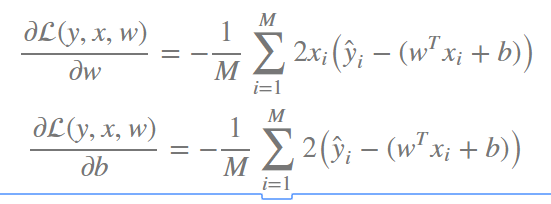

from calculus that the __gradient points__ in the direction of steepest ascent, but since we want our cost to decrease we invert its symbol

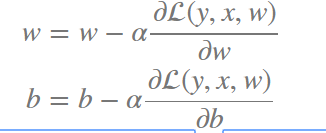

Where α is called learning rate and relates to much we trust the gradient at a given point, it is usually the case that 0<α<1. Setting the learning rate too high might lead to divergence since it risks overshooting the minimum

The Algorithm
The batch gradient descent algorithm works by iteratively updating the parameters using Eqs. 5 and 6 until a certain stopping criteria is met.

until stopping criteria:

1. Evaluate gradients
2. Update parameters by $P = P − α\frac{∂L(y,x,P)}{∂P}$

#### ------------------------------------------------------------
#### Numpy flatten example

In [42]:
a = np.arange(8).reshape(4, 2) 

print ('The original array is:' )
print (a) 
print ('\n' ) 

# default is column-major 
print ('The flattened array is:' )
print (a.flatten() )
print ('\n')  

print ('The flattened array in F-style ordering:' )
print (a.flatten(order = 'F'))

The original array is:
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


The flattened array is:
[0 1 2 3 4 5 6 7]


The flattened array in F-style ordering:
[0 2 4 6 1 3 5 7]


#### dot product
This function returns the dot product of two arrays. For 2-D vectors, it is the equivalent to matrix multiplication. For 1-D arrays, it is the inner product of the vectors. For N-dimensional arrays, it is a sum product over the last axis of a and the second-last axis of b.

In [43]:
a = np.array([[1,2],[3,4]]) 
b = np.array([[11,12],[13,14]]) 
np.dot(a,b)

array([[37, 40],
       [85, 92]])

In [44]:
A=[[1, 2], [3,4]]
B=[[1, 2], [3,4]]
np.inner(A,B)
np.inner(A,B)

array([[ 5, 11],
       [11, 25]])

In [45]:
# Create gradient function
def get_gradient(w, x, y):
    
    y_estimate = x.dot(w).flatten()
    
    error      =  (y.flatten() - y_estimate)
    
    mse        =  (1.0/len(x)) * np.sum(np.power(error, 2))
    
    gradient   = -(1.0/len(x)) * error.dot(x)
    
    return gradient, mse

In [46]:
# first initialize our weight matrix (w) with two random values (initializing with zeros is fine as well), 
# set our learning rate (α) and define our tolerance, which will define our stopping criteria later.
w         = np.random.randn(2)
alpha     = 0.5
tolerance = 1e-5

In [48]:
# Perform Gradient Descent

# Inside the loop we calculate the gradient and error for the current model and update the weight matrix, 
# we then check if the sum of the absolute differences between the new and old values is bigger than our 
# tolerance (or, in other words, if our model changed significantly).

iterations = 1
while True:
    
    gradient, error = get_gradient(w, 
                                   train_x, 
                                   train_y)
    
    new_w = w - alpha * gradient
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print ("Converged.")
        break
    
    # Print error every 50 iterations
    if iterations % 100 == 0:
        print ("Iteration: %d - Error: %.4f" %(iterations, error))
    
    iterations += 1
    w = new_w

print ("w =",w)
print ("Test Cost =", get_gradient(w, test_x, test_y)[1])

Converged.
w = [-2.12261563 11.08159678]
Test Cost = 2.4494910095113847


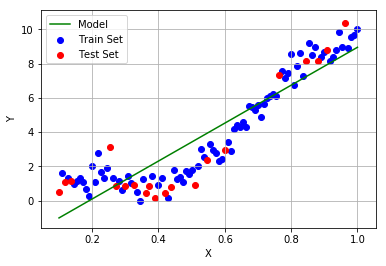

In [49]:
# Plot the model obtained
plt.plot(data_x[:,1], data_x.dot(w), c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


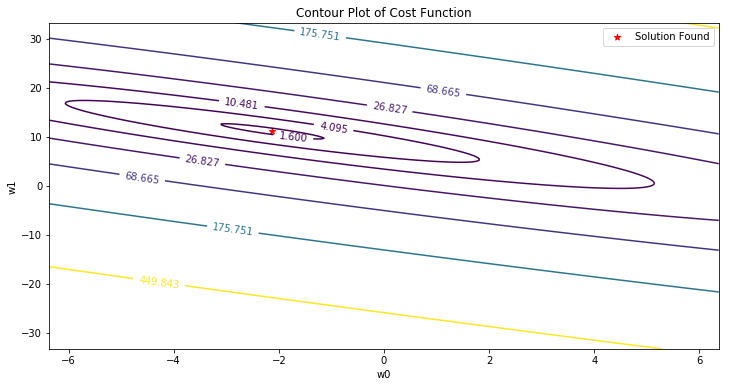

In [50]:
# Generate contour plot of the cost function
w1 = np.linspace(-w[1]*3, w[1]*3, 300)
w0 = np.linspace(-w[0]*3, w[0]*3, 300)
J_vals = np.zeros(shape=(w1.size, w0.size))

for t1, element in enumerate(w1):
    for t2, element2 in enumerate(w0):
        wT    = [0, 0]
        wT[1] = element
        wT[0] = element2
        J_vals[t1, t2] = get_gradient(wT, train_x, train_y)[1]

plt.figure(figsize=(12, 6))
plt.scatter(w[0], w[1], marker='*', color='r', s=40, label='Solution Found')

CS = plt.contour(w0, w1, J_vals, np.logspace(-10,10,50), label='Cost Function')

plt.clabel(CS, inline=1, fontsize=10)
plt.title("Contour Plot of Cost Function")
plt.xlabel("w0")
plt.ylabel("w1")
plt.legend(loc='best')
plt.show()